In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'chest-x-ray-images:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4610581%2F7859946%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240415%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240415T081917Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Db499ff9e6ed6306e6b57f64e108e69f692cfd0fd70f29512150a5f0467bc0dede3cc2cccbaebc094b4ce8bfa7a496ebe49d41d3a5069411db73ff8b0697bc5d9626229e6f46e13a31b7a888a5bdda7d74561596f72672e47e3bc0a2e812f03ef5fce8b2959e5d5cdf05e39fbc5039d6154d4ce97ae532014ff7b1c6bc35c4955afddc52cec1b9a2f509f915af079e2e60fb3d74ae69353288822a14a368a6468d63416ce00c713a53a6f3e1a1decdea9542db096bebbddcc347ec50c58b9064d0247e227a44811e28150bf0fe0a53001fceb4c1b2f226d90d00efba601cb0603cee3219f6eb599c301eda69910c65f968f6ab650282de425707a709a3ac734c4,resnet18-model:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4628445%2F7884876%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240415%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240415T081917Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Da1bb5b3578a56739647f513f67f0a46860fb53a4a616da3ffbd0261e2f03ff8f1eb65cd5e56c630e31aad65b16874f8231b79aee61844a6b1765dd64af89144e2384b06e2d30a403b4ef1ffa294758612a13f7f04726c949926425f9c773c6c2d0ead412c452a3d2200d266c85f97b83a4e06c0db66f2db0ca3733015892176651558318cf1e8ac41a43c624b66b35af520e0fd9812ca9077600973f6714d41e49e04e245a8fbfdc06d95bc0d46cc6d44af83b6c244bc9e5f32257116e7181bbed2f527c5de9f93602c1811ce27e20afe86e2bfcdb87aa1f433aea09f5a6323e8958065f5ce34b07dfb29cf6a78f4b8f524a1a854d2e1a9c35b3fcb0f31b00e3'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 765806673 bytes downloaded
Downloaded and uncompressed: chest-x-ray-images
[==================================================] 43451679 bytes downloaded
Downloaded and uncompressed: resnet18-model
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chest-x-ray-images/CXR Images/covid190026.png
/kaggle/input/chest-x-ray-images/CXR Images/EUNTcLTXYAEzvUG.jfif
/kaggle/input/chest-x-ray-images/CXR Images/covid1900388.png
/kaggle/input/chest-x-ray-images/CXR Images/EUR2DcOXgAEg1Xt.jfif
/kaggle/input/chest-x-ray-images/CXR Images/EUNWpWGWoAMgXxO.jfif
/kaggle/input/chest-x-ray-images/CXR Images/covid1900348.png
/kaggle/input/chest-x-ray-images/CXR Images/covid1900507.png
/kaggle/input/chest-x-ray-images/CXR Images/covid1900598.png
/kaggle/input/chest-x-ray-images/CXR Images/covid190030.png
/kaggle/input/chest-x-ray-images/CXR Images/065.jpeg
/kaggle/input/chest-x-ray-images/CXR Images/COVID-00032.jpg
/kaggle/input/chest-x-ray-images/CXR Images/covid1900167.png
/kaggle/input/chest-x-ray-images/CXR Images/covid-19-pneumonia-67.jpeg
/kaggle/input/chest-x-ray-images/CXR Images/CASE56_XRAY_1.jpeg
/kaggle/input/chest-x-ray-images/CXR Images/case38_Xray_1.jpeg
/kaggle/input/chest-x-ray-images/CXR Images/auntminnie-2020_01_31_20_2

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [ ]:
covid_directory = f'/kaggle/input/chest-x-ray-images/CXR Images'
normal_directory = f'/kaggle/input/chest-x-ray-images/CXR Images Normal'
pneumonia_directory = f'/kaggle/input/chest-x-ray-images/CXR Images Pneumonia'

image_size = (224, 224)

def load_images(directory):
    class_images = []
    for filename in os.listdir(directory):
        image_path = os.path.join(directory, filename)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        resized_image = cv2.resize(image, image_size)
        resized_image = resized_image.astype(np.float32)
        normalized_image = resized_image / 255.0
        class_images.append(normalized_image)

    return np.array(class_images)

covid_images = load_images(covid_directory)
normal_images = load_images(normal_directory)
pneumonia_images = load_images(pneumonia_directory)

print(covid_images.shape)
print(normal_images.shape)
print(pneumonia_images.shape)

(673, 224, 224, 3)
(758, 224, 224, 3)
(709, 224, 224, 3)


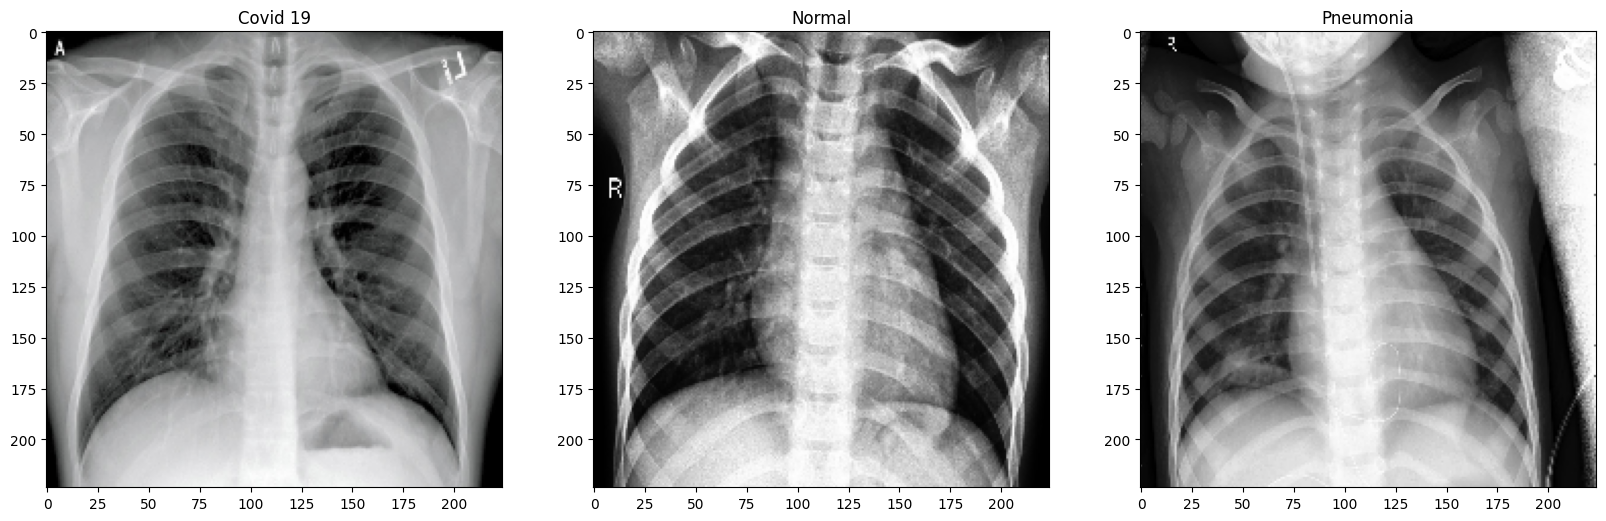

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize = (20,20))
ax[0].imshow(covid_images[0])
ax[0].title.set_text("Covid 19")
ax[1].imshow(normal_images[0])
ax[1].title.set_text("Normal")
ax[2].imshow(pneumonia_images[0])
ax[2].title.set_text("Pneumonia")

In [ ]:
all_images = np.concatenate((covid_images, normal_images, pneumonia_images), axis=0)
print(all_images.shape)
covid_labels = np.zeros(len(covid_images), dtype=np.int32)
pneumonia_labels = np.ones(len(pneumonia_images), dtype=np.int32)
normal_labels = np.full(len(normal_images), 2, dtype=np.int32)

all_labels = np.concatenate((covid_labels, normal_labels, pneumonia_labels), axis=0)
print(all_labels.shape)

(2140, 224, 224, 3)
(2140,)


In [ ]:
train_val_split, test_split = 0.6, 0.4
X_train_val, X_test, y_train_val, y_test = train_test_split(all_images, all_labels, train_size = train_val_split, test_size = test_split, random_state=42, stratify=all_labels)
train_split, val_split = 0.9, 0.1
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, train_size=train_split, test_size=val_split, random_state=42, stratify=y_train_val)


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import torchvision
import torch

In [ ]:
from torchvision.models import densenet161
from torch import nn

model_dn161 = densenet161(weights='DEFAULT')

input_features = model_dn161.classifier.in_features
model_dn161.classifier = nn.Sequential(
        nn.Dropout(p=0.6),
        nn.Linear(input_features, 3),
        nn.Softmax(dim=1)
    )

model_dn161.load_state_dict(torch.load('/content/gdrive/MyDrive/Model Checkpoints and metrics/densenet161_complete_saved.pt', map_location=torch.device('cpu')))
model_dn161.eval()

Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /root/.cache/torch/hub/checkpoints/densenet161-8d451a50.pth
100%|██████████| 110M/110M [00:00<00:00, 162MB/s] 


DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [ ]:
from torchvision.models import resnet18
from torch import nn

model_rn18 = resnet18(weights='DEFAULT')

input_features = model_rn18.fc.in_features
model_rn18.fc = nn.Linear(input_features, 3)
model_rn18.fc = nn.Sequential(nn.Dropout(p=0.5), model_rn18.fc, nn.Softmax(dim=1))

model_rn18.load_state_dict(torch.load('/content/gdrive/MyDrive/Model Checkpoints and metrics/resnet18_complete_saved.pt', map_location=torch.device('cpu')))
model_rn18.eval()

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 93.0MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
from torchvision.models import resnet34
from torch import nn

model_rn34 = resnet34(weights='DEFAULT')

input_features = model_rn34.fc.in_features
model_rn34.fc = nn.Sequential(
        nn.Dropout(p=0.6),
        nn.Linear(input_features, 3),
        nn.Softmax(dim=1)
    )

model_rn34.load_state_dict(torch.load('/content/gdrive/MyDrive/Model Checkpoints and metrics/resnet34_complete_saved.pt', map_location=torch.device('cpu')))
model_rn34.eval()

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 137MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
print(y_test[5], y_test[7], y_test[10])

2 1 0


In [ ]:
print(y_test[25], y_test[26], y_test[28])

0 1 2


In [ ]:
normal = torch.from_numpy(X_test[28])
print(normal.max(), normal.min())
normal = torch.unsqueeze(normal,dim=0).permute(0,3,1,2)
print(normal.shape)

tensor(1.) tensor(0.)
torch.Size([1, 3, 224, 224])


In [ ]:
outputs = model_dn161(normal)
print(outputs)
print(torch.argmax(outputs,dim=1))

tensor([[1.8759e-07, 1.6497e-07, 1.0000e+00]], grad_fn=<SoftmaxBackward0>)
tensor([2])


In [ ]:
pneumonia = torch.from_numpy(X_test[26])
print(pneumonia.max(), pneumonia.min())
pneumonia = torch.unsqueeze(pneumonia,dim=0).permute(0,3,1,2)
print(pneumonia.shape)

tensor(1.) tensor(0.0157)
torch.Size([1, 3, 224, 224])


In [ ]:
outputs = model_dn161(pneumonia)
print(outputs)
print(torch.argmax(outputs,dim=1))

tensor([[1.2076e-06, 1.0000e+00, 3.9529e-07]], grad_fn=<SoftmaxBackward0>)
tensor([1])


In [ ]:
covid = torch.from_numpy(X_test[25])
print(covid.max(), covid.min())
covid = torch.unsqueeze(covid,dim=0).permute(0,3,1,2)
print(covid.shape)

tensor(1.) tensor(0.0353)
torch.Size([1, 3, 224, 224])


In [ ]:
outputs = model_dn161(covid)
print(outputs)
print(torch.argmax(outputs,dim=1))

tensor([[9.9996e-01, 1.9582e-05, 2.3358e-05]], grad_fn=<SoftmaxBackward0>)
tensor([0])


In [ ]:
outputs = model_rn34(normal)
print(outputs)
print(torch.argmax(outputs,dim=1))

tensor([[3.4802e-06, 9.1304e-03, 9.9087e-01]], grad_fn=<SoftmaxBackward0>)
tensor([2])


In [ ]:
outputs = model_rn34(pneumonia)
print(outputs)
print(torch.argmax(outputs,dim=1))

tensor([[2.2667e-07, 1.0000e+00, 1.0693e-07]], grad_fn=<SoftmaxBackward0>)
tensor([1])


In [ ]:
outputs = model_rn34(covid)
print(outputs)
print(torch.argmax(outputs,dim=1))

tensor([[9.9996e-01, 3.1282e-05, 4.8882e-06]], grad_fn=<SoftmaxBackward0>)
tensor([0])


In [ ]:
outputs = model_rn18(normal)
print(outputs)
print(torch.argmax(outputs,dim=1))

tensor([[3.0534e-05, 2.1393e-07, 9.9997e-01]], grad_fn=<SoftmaxBackward0>)
tensor([2])


In [ ]:
outputs = model_rn18(pneumonia)
print(outputs)
print(torch.argmax(outputs,dim=1))

tensor([[1.4255e-04, 9.5083e-01, 4.9031e-02]], grad_fn=<SoftmaxBackward0>)
tensor([1])


In [ ]:
outputs = model_rn18(covid)
print(outputs)
print(torch.argmax(outputs,dim=1))

tensor([[9.9999e-01, 1.2588e-05, 2.1510e-06]], grad_fn=<SoftmaxBackward0>)
tensor([0])


In [ ]:
!pip install captum
!pip install grad-cam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylin

# **Saliency and GradCAM for both batches of images**

In [ ]:
import cv2

In [ ]:
source_path = '/content/gdrive/MyDrive/Interpretability Base Images DN161, RN18, RN34'
normal_2 = cv2.imread(source_path+'/normal_2.jpg')
normal_2 = torch.from_numpy(normal_2)
normal_2 = normal_2.type(torch.FloatTensor) / 255.0
normal_2 = torch.unsqueeze(normal_2, dim=0).permute(0,3,1,2)

In [ ]:
print(normal_2, normal_2.dtype)

tensor([[[[0.3098, 0.3882, 0.3569,  ..., 0.0078, 0.0039, 0.0000],
          [0.3137, 0.3569, 0.3529,  ..., 0.0078, 0.0039, 0.0000],
          [0.3176, 0.3137, 0.3412,  ..., 0.0078, 0.0078, 0.0039],
          ...,
          [0.0078, 0.0000, 0.0000,  ..., 0.0314, 0.0000, 0.0039],
          [0.0078, 0.0000, 0.0000,  ..., 0.0314, 0.0000, 0.0039],
          [0.0039, 0.0000, 0.0000,  ..., 0.0314, 0.0000, 0.0039]],

         [[0.3098, 0.3882, 0.3569,  ..., 0.0078, 0.0039, 0.0000],
          [0.3137, 0.3569, 0.3529,  ..., 0.0078, 0.0039, 0.0000],
          [0.3176, 0.3137, 0.3412,  ..., 0.0078, 0.0078, 0.0039],
          ...,
          [0.0078, 0.0000, 0.0000,  ..., 0.0314, 0.0000, 0.0039],
          [0.0078, 0.0000, 0.0000,  ..., 0.0314, 0.0000, 0.0039],
          [0.0039, 0.0000, 0.0000,  ..., 0.0314, 0.0000, 0.0039]],

         [[0.3098, 0.3882, 0.3569,  ..., 0.0078, 0.0039, 0.0000],
          [0.3137, 0.3569, 0.3529,  ..., 0.0078, 0.0039, 0.0000],
          [0.3176, 0.3137, 0.3412,  ..., 0

In [ ]:
import captum
from captum.attr import Saliency

In [ ]:
saliency = Saliency(model_dn161)
attributions = saliency.attribute(normal_2, target=2)

/usr/local/lib/python3.10/dist-packages/captum/_utils/gradient.py:57: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  warnings.warn(


In [ ]:
print(attributions)

tensor([[[[3.3002e-10, 3.0695e-09, 3.4666e-09,  ..., 3.6548e-09,
           1.5543e-08, 6.1436e-09],
          [4.8719e-09, 3.1512e-09, 1.0548e-08,  ..., 1.0131e-07,
           8.5888e-10, 2.3327e-09],
          [4.4684e-09, 1.6168e-08, 2.9207e-08,  ..., 5.9989e-08,
           1.0411e-08, 2.3399e-09],
          ...,
          [1.2770e-10, 6.5007e-10, 8.4701e-11,  ..., 9.8075e-10,
           1.1524e-09, 6.9211e-10],
          [8.9356e-10, 4.0688e-10, 4.2090e-10,  ..., 9.7741e-10,
           7.9426e-10, 4.2523e-10],
          [1.9658e-11, 8.3765e-10, 5.1440e-10,  ..., 1.0695e-09,
           3.1000e-10, 5.4826e-10]],

         [[6.4534e-10, 1.2421e-09, 3.8811e-09,  ..., 2.8749e-08,
           3.4177e-08, 5.4633e-09],
          [4.3107e-09, 5.8011e-09, 1.1532e-08,  ..., 1.3523e-07,
           3.2342e-10, 1.1299e-08],
          [8.2379e-09, 1.6708e-08, 3.7204e-08,  ..., 5.9070e-08,
           4.4161e-09, 2.3256e-08],
          ...,
          [1.5708e-10, 1.1192e-09, 4.3115e-10,  ..., 1.0467

In [ ]:
import captum
normal_2 = torch.squeeze(normal_2, dim=0)
normal_2 = normal_2.permute(1,2,0)
attributions = torch.squeeze(attributions, dim=0).permute(1,2,0)
print(normal_2.shape, attributions.shape)

torch.Size([224, 224, 3]) torch.Size([224, 224, 3])


In [ ]:
attributions = attributions.numpy()
normal_2 = normal_2.numpy()


In [ ]:
attributions = (attributions - attributions.min()) / (attributions.max() - attributions.min())


In [ ]:
print(attributions.shape)

(224, 224, 3)


In [ ]:
import matplotlib.pyplot as plt

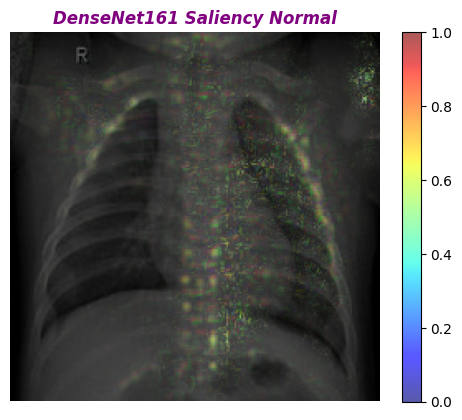

In [ ]:
plt.imshow(normal_2)
plt.imshow(attributions, cmap='jet', alpha=0.65)
plt.colorbar(fraction=0.06, pad=0.046, orientation='vertical')
plt.title("DenseNet161 Saliency Normal", color='purple', weight='bold', style='oblique')
plt.axis('off')
plt.show()

In [ ]:
source_path = '/content/gdrive/MyDrive/Interpretability Base Images DN161, RN18, RN34'
covid_2 = cv2.imread(source_path+'/covid_2.jpg')
covid_2 = torch.from_numpy(covid_2)
covid_2 = covid_2.type(torch.FloatTensor) / 255.0
covid_2 = torch.unsqueeze(covid_2, dim=0).permute(0,3,1,2)

In [ ]:
print(covid_2.dtype, covid_2.shape)

torch.float32 torch.Size([1, 3, 224, 224])


In [ ]:
saliency = Saliency(model_dn161)
attributions = saliency.attribute(covid_2, target=0)

In [ ]:
print(attributions)

tensor([[[[1.1929e-07, 1.7911e-07, 2.5162e-07,  ..., 9.1500e-08,
           5.0292e-08, 6.2074e-08],
          [1.2976e-07, 2.9848e-07, 4.8824e-07,  ..., 7.4414e-08,
           1.0906e-07, 2.0264e-07],
          [4.4925e-07, 7.5005e-07, 1.0230e-06,  ..., 1.4238e-07,
           4.1963e-07, 1.3335e-07],
          ...,
          [1.2498e-08, 2.1377e-06, 1.1052e-06,  ..., 2.1406e-07,
           1.8174e-07, 9.5447e-08],
          [3.7220e-07, 5.3415e-07, 2.0952e-06,  ..., 5.4240e-08,
           4.2290e-08, 1.0726e-07],
          [6.8412e-07, 1.6449e-06, 8.2539e-07,  ..., 1.6019e-07,
           1.0216e-07, 1.8962e-08]],

         [[2.4819e-07, 3.9211e-07, 4.9408e-07,  ..., 9.9327e-08,
           1.9648e-07, 1.8824e-07],
          [3.2571e-07, 5.3657e-07, 7.8704e-07,  ..., 1.0438e-07,
           8.9206e-08, 2.7006e-07],
          [5.8902e-07, 8.9426e-07, 1.2591e-06,  ..., 3.6419e-07,
           4.7663e-07, 1.9511e-07],
          ...,
          [3.5724e-08, 2.6571e-06, 1.5985e-06,  ..., 2.7407

In [ ]:
import captum
covid_2 = torch.squeeze(covid_2, dim=0)
covid_2 = covid_2.permute(1,2,0)
attributions = torch.squeeze(attributions, dim=0).permute(1,2,0)
print(covid_2.shape, attributions.shape)

torch.Size([224, 224, 3]) torch.Size([224, 224, 3])


In [ ]:
attributions = attributions.numpy()
covid_2 = covid_2.numpy()


In [ ]:
attributions = (attributions - attributions.min()) / (attributions.max() - attributions.min())


In [ ]:
print(attributions.shape)

(224, 224, 3)


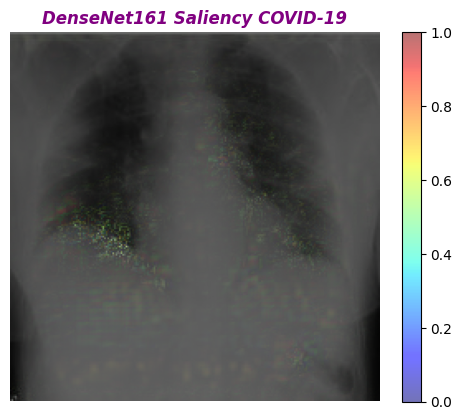

In [ ]:
plt.imshow(covid_2)
plt.imshow(attributions, cmap='jet', alpha=0.55)
plt.colorbar(fraction=0.06, pad=0.046, orientation='vertical')
plt.title("DenseNet161 Saliency COVID-19", color='purple', weight='bold', style='oblique')
plt.axis('off')
plt.show()

In [ ]:
source_path = '/content/gdrive/MyDrive/Interpretability Base Images DN161, RN18, RN34'
pneumonia_2 = cv2.imread(source_path+'/pneumonia_2.jpg')
pneumonia_2 = torch.from_numpy(pneumonia_2)
pneumonia_2 = pneumonia_2.type(torch.FloatTensor) / 255.0
pneumonia_2 = torch.unsqueeze(pneumonia_2, dim=0).permute(0,3,1,2)

In [ ]:
print(pneumonia_2.dtype, pneumonia_2.shape)

torch.float32 torch.Size([1, 3, 224, 224])


In [ ]:
saliency = Saliency(model_dn161)
attributions = saliency.attribute(pneumonia_2, target=1)

In [ ]:
print(attributions)

tensor([[[[1.9914e-09, 6.7788e-09, 9.3201e-09,  ..., 7.3374e-09,
           1.7654e-08, 3.3179e-08],
          [3.1922e-09, 3.2004e-10, 3.0825e-09,  ..., 1.6821e-08,
           1.9571e-07, 6.4394e-08],
          [9.4318e-09, 8.9084e-09, 8.5023e-09,  ..., 1.9579e-07,
           4.8202e-07, 3.1531e-07],
          ...,
          [8.3213e-09, 5.5537e-10, 1.2683e-08,  ..., 8.0330e-08,
           5.7632e-08, 3.4442e-08],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 2.7242e-08,
           6.1511e-09, 1.7534e-08],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 3.3443e-08,
           3.4277e-09, 9.0151e-10]],

         [[3.5293e-10, 4.3367e-09, 5.7535e-09,  ..., 7.4135e-08,
           1.1009e-08, 6.8015e-09],
          [2.0950e-09, 3.7428e-09, 2.7099e-09,  ..., 2.9950e-08,
           2.9426e-07, 1.0570e-07],
          [1.0103e-08, 7.0896e-09, 1.9879e-09,  ..., 3.7325e-07,
           6.6399e-07, 4.3549e-07],
          ...,
          [1.8198e-09, 7.4313e-09, 5.3372e-09,  ..., 1.7258

In [ ]:
import captum
pneumonia_2 = torch.squeeze(pneumonia_2, dim=0)
pneumonia_2 = pneumonia_2.permute(1,2,0)
attributions = torch.squeeze(attributions, dim=0).permute(1,2,0)
print(pneumonia_2.shape, attributions.shape)

torch.Size([224, 224, 3]) torch.Size([224, 224, 3])


In [ ]:
attributions = attributions.numpy()
pneumonia_2 = pneumonia_2.numpy()


In [ ]:
attributions = (attributions - attributions.min()) / (attributions.max() - attributions.min())


In [ ]:
print(attributions.shape)

(224, 224, 3)


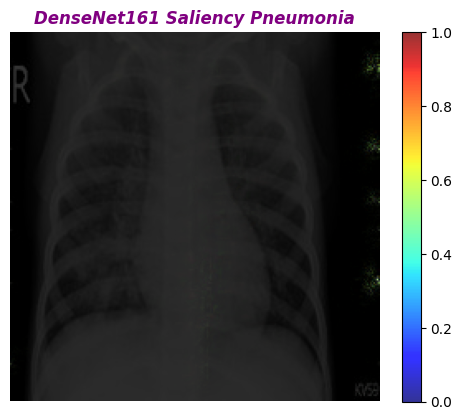

In [ ]:
plt.imshow(pneumonia_2)
plt.imshow(attributions, cmap='jet', alpha=0.8)
plt.colorbar(fraction=0.06, pad=0.046, orientation='vertical')
plt.title("DenseNet161 Saliency Pneumonia", color='purple', weight='bold', style='oblique')
plt.axis('off')
plt.show()

In [ ]:
source_path = '/content/gdrive/MyDrive/Interpretability Base Images DN161, RN18, RN34'
normal_2 = cv2.imread(source_path+'/normal_2.jpg')
normal_2 = torch.from_numpy(normal_2)
normal_2 = normal_2.type(torch.FloatTensor) / 255.0
normal_2 = torch.unsqueeze(normal_2, dim=0).permute(0,3,1,2)

In [ ]:
print(normal_2, normal_2.dtype)

tensor([[[[0.3098, 0.3882, 0.3569,  ..., 0.0078, 0.0039, 0.0000],
          [0.3137, 0.3569, 0.3529,  ..., 0.0078, 0.0039, 0.0000],
          [0.3176, 0.3137, 0.3412,  ..., 0.0078, 0.0078, 0.0039],
          ...,
          [0.0078, 0.0000, 0.0000,  ..., 0.0314, 0.0000, 0.0039],
          [0.0078, 0.0000, 0.0000,  ..., 0.0314, 0.0000, 0.0039],
          [0.0039, 0.0000, 0.0000,  ..., 0.0314, 0.0000, 0.0039]],

         [[0.3098, 0.3882, 0.3569,  ..., 0.0078, 0.0039, 0.0000],
          [0.3137, 0.3569, 0.3529,  ..., 0.0078, 0.0039, 0.0000],
          [0.3176, 0.3137, 0.3412,  ..., 0.0078, 0.0078, 0.0039],
          ...,
          [0.0078, 0.0000, 0.0000,  ..., 0.0314, 0.0000, 0.0039],
          [0.0078, 0.0000, 0.0000,  ..., 0.0314, 0.0000, 0.0039],
          [0.0039, 0.0000, 0.0000,  ..., 0.0314, 0.0000, 0.0039]],

         [[0.3098, 0.3882, 0.3569,  ..., 0.0078, 0.0039, 0.0000],
          [0.3137, 0.3569, 0.3529,  ..., 0.0078, 0.0039, 0.0000],
          [0.3176, 0.3137, 0.3412,  ..., 0

In [ ]:
saliency = Saliency(model_rn18)
attributions = saliency.attribute(normal_2, target=2)

In [ ]:
print(attributions)

tensor([[[[4.3003e-06, 4.3071e-05, 3.6878e-05,  ..., 4.9209e-06,
           1.7115e-06, 9.4706e-07],
          [9.0849e-06, 3.8736e-06, 2.3069e-05,  ..., 3.5140e-06,
           2.8777e-06, 2.5286e-06],
          [7.7796e-07, 4.6031e-05, 4.4877e-06,  ..., 1.3789e-06,
           2.4625e-06, 3.0214e-06],
          ...,
          [1.1515e-05, 4.4703e-05, 9.1769e-05,  ..., 1.4083e-05,
           5.0090e-07, 1.5352e-05],
          [5.8804e-06, 5.7369e-05, 2.4919e-05,  ..., 1.3213e-05,
           3.5676e-06, 5.5394e-06],
          [1.0406e-05, 2.3701e-05, 6.4606e-05,  ..., 2.5093e-05,
           1.2316e-07, 4.6483e-06]],

         [[2.7276e-05, 6.8911e-05, 5.5400e-05,  ..., 3.8537e-06,
           7.0472e-07, 2.2812e-06],
          [4.8199e-05, 5.0938e-05, 1.0574e-06,  ..., 2.3629e-07,
           3.1477e-07, 3.0772e-07],
          [3.5127e-05, 1.2413e-05, 2.3163e-05,  ..., 4.3102e-06,
           2.0737e-06, 1.6497e-06],
          ...,
          [1.8673e-05, 1.3836e-05, 7.1836e-05,  ..., 1.3015

In [ ]:
import captum
normal_2 = torch.squeeze(normal_2, dim=0)
normal_2 = normal_2.permute(1,2,0)
attributions = torch.squeeze(attributions, dim=0).permute(1,2,0)
print(normal_2.shape, attributions.shape)

torch.Size([224, 224, 3]) torch.Size([224, 224, 3])


In [ ]:
attributions = attributions.numpy()
normal_2 = normal_2.numpy()


In [ ]:
attributions = (attributions - attributions.min()) / (attributions.max() - attributions.min())


In [ ]:
print(attributions.shape)

(224, 224, 3)


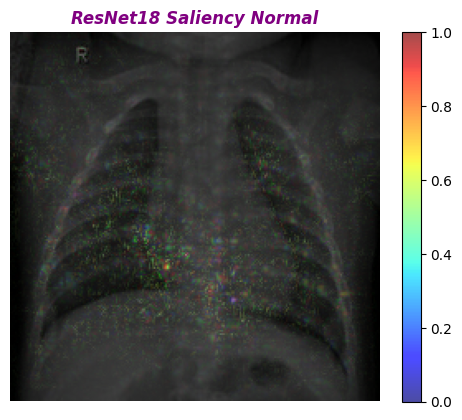

In [ ]:
plt.imshow(normal_2)
plt.imshow(attributions, cmap='jet', alpha=0.7)
plt.colorbar(fraction=0.06, pad=0.046, orientation='vertical')
plt.title("ResNet18 Saliency Normal", color='purple', weight='bold', style='oblique')
plt.axis('off')
plt.show()

In [ ]:
source_path = '/content/gdrive/MyDrive/Interpretability Base Images DN161, RN18, RN34'
covid_2 = cv2.imread(source_path+'/covid_2.jpg')
covid_2 = torch.from_numpy(covid_2)
covid_2 = covid_2.type(torch.FloatTensor) / 255.0
covid_2 = torch.unsqueeze(covid_2, dim=0).permute(0,3,1,2)

In [ ]:
print(covid_2.dtype, covid_2.shape)

torch.float32 torch.Size([1, 3, 224, 224])


In [ ]:
saliency = Saliency(model_rn18)
attributions = saliency.attribute(covid_2, target=0)

In [ ]:
print(attributions)

tensor([[[[1.0341e-11, 4.0205e-11, 2.1308e-11,  ..., 5.8813e-12,
           3.4197e-11, 3.1711e-11],
          [5.1096e-11, 7.6733e-11, 4.0182e-11,  ..., 9.4618e-12,
           2.7186e-11, 4.6278e-11],
          [7.6559e-11, 6.3833e-11, 4.7002e-11,  ..., 4.6916e-11,
           1.0750e-11, 2.8826e-11],
          ...,
          [5.3946e-12, 4.4299e-11, 7.2014e-12,  ..., 2.9673e-12,
           4.9673e-12, 2.3809e-12],
          [1.5663e-11, 1.3735e-11, 1.5479e-11,  ..., 1.0208e-14,
           1.1791e-11, 5.2281e-12],
          [6.3071e-12, 3.7527e-11, 1.9057e-11,  ..., 1.1839e-12,
           1.1850e-11, 2.1878e-12]],

         [[2.0463e-11, 8.5825e-12, 3.4480e-11,  ..., 1.3345e-11,
           3.5712e-11, 3.1090e-11],
          [1.1071e-12, 1.1322e-11, 9.7360e-11,  ..., 1.2927e-11,
           1.7678e-11, 4.7010e-11],
          [1.9889e-11, 1.1514e-10, 2.0055e-10,  ..., 1.6406e-11,
           1.5336e-11, 1.6383e-11],
          ...,
          [9.5251e-12, 4.9131e-11, 9.4218e-12,  ..., 1.2273

In [ ]:
import captum
covid_2 = torch.squeeze(covid_2, dim=0)
covid_2 = covid_2.permute(1,2,0)
attributions = torch.squeeze(attributions, dim=0).permute(1,2,0)
print(covid_2.shape, attributions.shape)

torch.Size([224, 224, 3]) torch.Size([224, 224, 3])


In [ ]:
attributions = attributions.numpy()
covid_2 = covid_2.numpy()


In [ ]:
attributions = (attributions - attributions.min()) / (attributions.max() - attributions.min())


In [ ]:
print(attributions.shape)

(224, 224, 3)


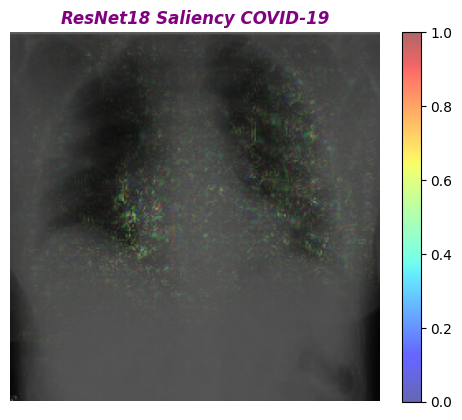

In [ ]:
plt.imshow(covid_2)
plt.imshow(attributions, cmap='jet', alpha=0.6)
plt.colorbar(fraction=0.06, pad=0.046, orientation='vertical')
plt.title("ResNet18 Saliency COVID-19", color='purple', weight='bold', style='oblique')
plt.axis('off')
plt.show()

In [ ]:
source_path = '/content/gdrive/MyDrive/Interpretability Base Images DN161, RN18, RN34'
pneumonia_2 = cv2.imread(source_path+'/pneumonia_2.jpg')
pneumonia_2 = torch.from_numpy(pneumonia_2)
pneumonia_2 = pneumonia_2.type(torch.FloatTensor) / 255.0
pneumonia_2 = torch.unsqueeze(pneumonia_2, dim=0).permute(0,3,1,2)

In [ ]:
print(pneumonia_2.dtype, pneumonia_2.shape)

torch.float32 torch.Size([1, 3, 224, 224])


In [ ]:
saliency = Saliency(model_rn18)
attributions = saliency.attribute(pneumonia_2, target=1)

In [ ]:
print(attributions)

tensor([[[[5.4587e-06, 2.4609e-06, 4.5633e-06,  ..., 1.4287e-06,
           1.6726e-08, 7.1834e-07],
          [1.7867e-06, 4.0994e-06, 5.2483e-06,  ..., 3.0610e-06,
           9.7673e-07, 8.5223e-07],
          [1.0478e-06, 1.2716e-06, 4.4820e-06,  ..., 1.6873e-06,
           9.2082e-07, 3.0403e-07],
          ...,
          [2.2995e-06, 5.4986e-06, 6.1248e-06,  ..., 4.8414e-05,
           2.5787e-05, 2.1090e-05],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 2.8768e-05,
           1.3992e-05, 9.8794e-06],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 1.6013e-06,
           4.0441e-06, 1.7425e-06]],

         [[5.0653e-06, 1.2022e-06, 1.4956e-06,  ..., 1.8111e-06,
           2.6158e-08, 1.1510e-06],
          [2.0544e-06, 2.9058e-06, 5.3894e-06,  ..., 7.5946e-07,
           1.7112e-06, 1.3584e-06],
          [5.7051e-06, 8.4458e-06, 1.8940e-05,  ..., 6.4363e-06,
           1.8627e-06, 8.9074e-08],
          ...,
          [4.8173e-06, 3.6337e-06, 9.2584e-06,  ..., 6.9097

In [ ]:
import captum
pneumonia_2 = torch.squeeze(pneumonia_2, dim=0)
pneumonia_2 = pneumonia_2.permute(1,2,0)
attributions = torch.squeeze(attributions, dim=0).permute(1,2,0)
print(pneumonia_2.shape, attributions.shape)

torch.Size([224, 224, 3]) torch.Size([224, 224, 3])


In [ ]:
attributions = attributions.numpy()
pneumonia_2 = pneumonia_2.numpy()


In [ ]:
attributions = (attributions - attributions.min()) / (attributions.max() - attributions.min())


In [ ]:
print(attributions.shape)

(224, 224, 3)


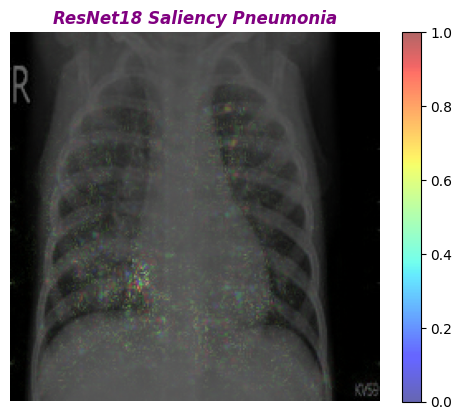

In [ ]:
plt.imshow(pneumonia_2)
plt.imshow(attributions, cmap='jet', alpha=0.6)
plt.colorbar(fraction=0.06, pad=0.046, orientation='vertical')
plt.title("ResNet18 Saliency Pneumonia", color='purple', weight='bold', style='oblique')
plt.axis('off')
plt.show()

In [ ]:
source_path = '/content/gdrive/MyDrive/Interpretability Base Images DN161, RN18, RN34'
normal_2 = cv2.imread(source_path+'/normal_2.jpg')
normal_2 = torch.from_numpy(normal_2)
normal_2 = normal_2.type(torch.FloatTensor) / 255.0
normal_2 = torch.unsqueeze(normal_2, dim=0).permute(0,3,1,2)

In [ ]:
print(normal_2, normal_2.dtype)

tensor([[[[0.3098, 0.3882, 0.3569,  ..., 0.0078, 0.0039, 0.0000],
          [0.3137, 0.3569, 0.3529,  ..., 0.0078, 0.0039, 0.0000],
          [0.3176, 0.3137, 0.3412,  ..., 0.0078, 0.0078, 0.0039],
          ...,
          [0.0078, 0.0000, 0.0000,  ..., 0.0314, 0.0000, 0.0039],
          [0.0078, 0.0000, 0.0000,  ..., 0.0314, 0.0000, 0.0039],
          [0.0039, 0.0000, 0.0000,  ..., 0.0314, 0.0000, 0.0039]],

         [[0.3098, 0.3882, 0.3569,  ..., 0.0078, 0.0039, 0.0000],
          [0.3137, 0.3569, 0.3529,  ..., 0.0078, 0.0039, 0.0000],
          [0.3176, 0.3137, 0.3412,  ..., 0.0078, 0.0078, 0.0039],
          ...,
          [0.0078, 0.0000, 0.0000,  ..., 0.0314, 0.0000, 0.0039],
          [0.0078, 0.0000, 0.0000,  ..., 0.0314, 0.0000, 0.0039],
          [0.0039, 0.0000, 0.0000,  ..., 0.0314, 0.0000, 0.0039]],

         [[0.3098, 0.3882, 0.3569,  ..., 0.0078, 0.0039, 0.0000],
          [0.3137, 0.3569, 0.3529,  ..., 0.0078, 0.0039, 0.0000],
          [0.3176, 0.3137, 0.3412,  ..., 0

In [ ]:
saliency = Saliency(model_rn34)
attributions = saliency.attribute(normal_2, target=2)

In [ ]:
print(attributions)

tensor([[[[2.4922e-03, 5.7965e-03, 8.8601e-04,  ..., 4.1831e-04,
           2.2961e-05, 2.4867e-04],
          [2.6665e-03, 7.6555e-03, 1.5918e-02,  ..., 5.4886e-04,
           1.3677e-04, 1.0189e-04],
          [6.5000e-03, 6.9799e-03, 1.4952e-02,  ..., 4.2249e-04,
           8.4763e-04, 1.7900e-04],
          ...,
          [4.5322e-04, 6.1735e-05, 1.3733e-03,  ..., 4.7422e-04,
           4.9794e-05, 1.4101e-04],
          [4.6511e-04, 5.2271e-04, 4.3631e-04,  ..., 4.1269e-04,
           9.6644e-05, 1.5280e-04],
          [1.6256e-05, 2.2950e-04, 2.1519e-04,  ..., 3.3849e-04,
           4.7952e-04, 4.7534e-04]],

         [[5.6236e-03, 2.3654e-03, 6.9668e-03,  ..., 1.4431e-03,
           4.0338e-04, 1.4502e-04],
          [1.4017e-02, 1.2556e-02, 1.1087e-03,  ..., 8.6300e-05,
           1.1217e-05, 2.4001e-04],
          [1.8383e-02, 2.6550e-02, 1.2393e-02,  ..., 3.9277e-05,
           9.7467e-04, 6.0287e-05],
          ...,
          [4.1573e-05, 5.1673e-04, 1.2472e-05,  ..., 3.2985

In [ ]:
import captum
normal_2 = torch.squeeze(normal_2, dim=0)
normal_2 = normal_2.permute(1,2,0)
attributions = torch.squeeze(attributions, dim=0).permute(1,2,0)
print(normal_2.shape, attributions.shape)

torch.Size([224, 224, 3]) torch.Size([224, 224, 3])


In [ ]:
attributions = attributions.numpy()
normal_2 = normal_2.numpy()


In [ ]:
attributions = (attributions - attributions.min()) / (attributions.max() - attributions.min())


In [ ]:
print(attributions.shape)

(224, 224, 3)


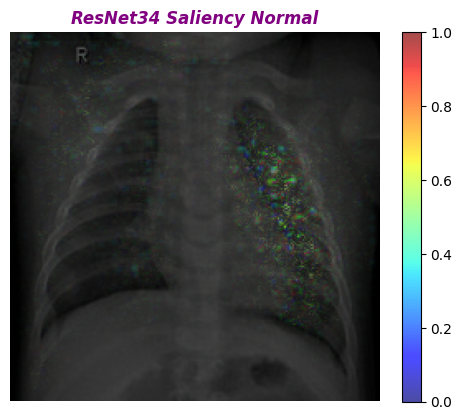

In [ ]:
plt.imshow(normal_2)
plt.imshow(attributions, cmap='jet', alpha=0.7)
plt.colorbar(fraction=0.06, pad=0.046, orientation='vertical')
plt.title("ResNet34 Saliency Normal", color='purple', weight='bold', style='oblique')
plt.axis('off')
plt.show()

In [ ]:
source_path = '/content/gdrive/MyDrive/Interpretability Base Images DN161, RN18, RN34'
covid_2 = cv2.imread(source_path+'/covid_2.jpg')
covid_2 = torch.from_numpy(covid_2)
covid_2 = covid_2.type(torch.FloatTensor) / 255.0
covid_2 = torch.unsqueeze(covid_2, dim=0).permute(0,3,1,2)

In [ ]:
print(covid_2.dtype, covid_2.shape)

torch.float32 torch.Size([1, 3, 224, 224])


In [ ]:
saliency = Saliency(model_rn34)
attributions = saliency.attribute(covid_2, target=0)

In [ ]:
print(attributions)

tensor([[[[1.1335e-11, 7.1222e-12, 1.0366e-11,  ..., 3.0946e-12,
           3.6641e-12, 1.8671e-12],
          [3.3772e-12, 1.4520e-11, 5.7629e-12,  ..., 8.9914e-13,
           3.1718e-12, 4.0553e-12],
          [9.5153e-12, 4.1499e-13, 8.4282e-12,  ..., 9.1466e-13,
           1.3424e-12, 2.7771e-12],
          ...,
          [1.0636e-12, 4.4219e-12, 2.1027e-13,  ..., 1.7380e-12,
           1.4501e-12, 1.0747e-11],
          [3.9948e-12, 1.1581e-12, 5.7899e-12,  ..., 1.3100e-11,
           1.3834e-12, 2.9120e-12],
          [5.8963e-12, 4.4368e-12, 1.5888e-11,  ..., 1.1635e-11,
           6.9113e-12, 7.9264e-13]],

         [[2.0324e-12, 2.8572e-12, 2.1661e-12,  ..., 6.4859e-12,
           4.2365e-12, 2.3348e-12],
          [2.9882e-11, 5.5035e-11, 3.1459e-11,  ..., 2.0116e-12,
           2.9987e-12, 4.5529e-12],
          [5.0921e-11, 7.4923e-11, 8.3797e-11,  ..., 4.2380e-12,
           1.9175e-12, 3.6983e-12],
          ...,
          [1.8807e-12, 2.2274e-13, 1.4744e-11,  ..., 1.6133

In [ ]:
import captum
covid_2 = torch.squeeze(covid_2, dim=0)
covid_2 = covid_2.permute(1,2,0)
attributions = torch.squeeze(attributions, dim=0).permute(1,2,0)
print(covid_2.shape, attributions.shape)

torch.Size([224, 224, 3]) torch.Size([224, 224, 3])


In [ ]:
attributions = attributions.numpy()
covid_2 = covid_2.numpy()


In [ ]:
attributions = (attributions - attributions.min()) / (attributions.max() - attributions.min())


In [ ]:
print(attributions.shape)

(224, 224, 3)


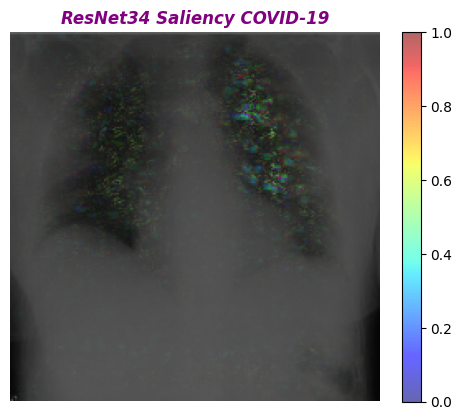

In [ ]:
plt.imshow(covid_2)
plt.imshow(attributions, cmap='jet', alpha=0.6)
plt.colorbar(fraction=0.06, pad=0.046, orientation='vertical')
plt.title("ResNet34 Saliency COVID-19", color='purple', weight='bold', style='oblique')
plt.axis('off')
plt.show()

In [ ]:
source_path = '/content/gdrive/MyDrive/Interpretability Base Images DN161, RN18, RN34'
pneumonia_2 = cv2.imread(source_path+'/pneumonia_2.jpg')
pneumonia_2 = torch.from_numpy(pneumonia_2)
pneumonia_2 = pneumonia_2.type(torch.FloatTensor) / 255.0
pneumonia_2 = torch.unsqueeze(pneumonia_2, dim=0).permute(0,3,1,2)

In [ ]:
print(pneumonia_2.dtype, pneumonia_2.shape)

torch.float32 torch.Size([1, 3, 224, 224])


In [ ]:
saliency = Saliency(model_rn34)
attributions = saliency.attribute(pneumonia_2, target=1)

In [ ]:
print(attributions)

tensor([[[[4.2150e-11, 1.9400e-10, 1.7148e-10,  ..., 1.5135e-13,
           1.5992e-13, 2.7032e-13],
          [1.4143e-10, 7.0817e-11, 1.1659e-10,  ..., 3.7147e-12,
           2.7700e-13, 2.5447e-12],
          [8.9599e-12, 1.1745e-10, 1.0759e-10,  ..., 8.6870e-12,
           7.1113e-12, 7.2697e-12],
          ...,
          [1.7112e-12, 9.2769e-13, 7.1286e-13,  ..., 4.2142e-13,
           3.4312e-14, 1.1035e-13],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 5.5595e-13,
           8.0519e-14, 3.0326e-15],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 4.3382e-13,
           1.6839e-13, 1.0651e-13]],

         [[2.2993e-11, 1.0246e-10, 7.5642e-11,  ..., 3.0499e-12,
           3.6866e-12, 2.8397e-12],
          [5.1519e-11, 1.0368e-10, 3.1401e-10,  ..., 6.2685e-12,
           7.2142e-13, 4.6178e-12],
          [1.4330e-10, 3.5320e-10, 3.1285e-10,  ..., 1.6184e-11,
           8.6295e-12, 8.3582e-12],
          ...,
          [1.2609e-12, 3.3824e-12, 8.6945e-12,  ..., 2.8097

In [ ]:
import captum
pneumonia_2 = torch.squeeze(pneumonia_2, dim=0)
pneumonia_2 = pneumonia_2.permute(1,2,0)
attributions = torch.squeeze(attributions, dim=0).permute(1,2,0)
print(pneumonia_2.shape, attributions.shape)

torch.Size([224, 224, 3]) torch.Size([224, 224, 3])


In [ ]:
attributions = attributions.numpy()
pneumonia_2 = pneumonia_2.numpy()


In [ ]:
attributions = (attributions - attributions.min()) / (attributions.max() - attributions.min())


In [ ]:
print(attributions.shape)

(224, 224, 3)


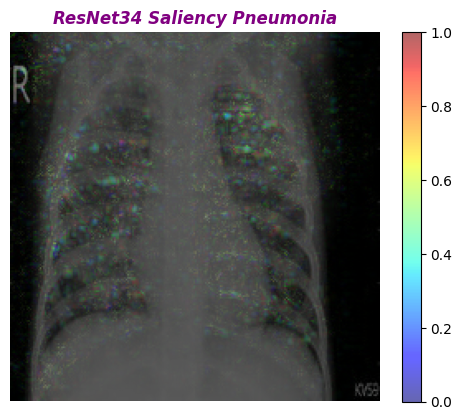

In [ ]:
plt.imshow(pneumonia_2)
plt.imshow(attributions, cmap='jet', alpha=0.6)
plt.colorbar(fraction=0.06, pad=0.046, orientation='vertical')
plt.title("ResNet34 Saliency Pneumonia", color='purple', weight='bold', style='oblique')
plt.axis('off')
plt.show()

In [ ]:
source_path = '/content/gdrive/MyDrive/Interpretability Base Images DN161, RN18, RN34'
normal_2 = cv2.imread(source_path+'/normal_2.jpg')
normal_2 = torch.from_numpy(normal_2)
normal_2 = normal_2.type(torch.FloatTensor) / 255.0
normal_2 = torch.unsqueeze(normal_2, dim=0).permute(0,3,1,2)

In [ ]:
from pytorch_grad_cam import GradCAM

target_layer = [model_dn161.features[-1]]

cam = GradCAM(model=model_dn161, target_layers=target_layer)

cam_map = cam(input_tensor=normal_2, eigen_smooth=True, aug_smooth=True)

print(cam_map)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [ ]:
import numpy as np

In [ ]:
print(type(cam_map))
print(cam_map.shape)
cam_map = np.reshape(cam_map, (224,224,1))
print(cam_map.shape)

<class 'numpy.ndarray'>
(1, 224, 224)
(224, 224, 1)


In [ ]:
image_numpy = torch.squeeze(normal_2, dim=0).permute(1,2,0).numpy()
print(type(image_numpy), image_numpy.shape)

<class 'numpy.ndarray'> (224, 224, 3)


In [ ]:
import matplotlib.pyplot as plt

cam_map_normalized = (cam_map - np.min(cam_map)) / (np.max(cam_map) - np.min(cam_map))

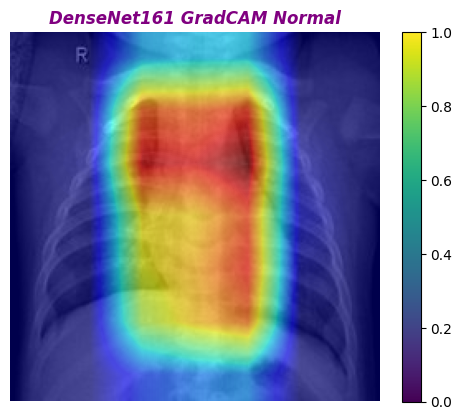

In [ ]:
fig, ax = plt.subplots()

heatmap = ax.imshow(image_numpy)

ax.imshow(cam_map_normalized, cmap='jet', alpha=0.6, interpolation='bilinear')
plt.colorbar(heatmap, fraction=0.06, pad=0.046)
plt.title("DenseNet161 GradCAM Normal", color='purple', weight='bold', style='oblique')
ax.axis('off')

plt.show()


In [ ]:
source_path = '/content/gdrive/MyDrive/Interpretability Base Images DN161, RN18, RN34'
covid_2 = cv2.imread(source_path+'/covid_2.jpg')
covid_2 = torch.from_numpy(covid_2)
covid_2 = covid_2.type(torch.FloatTensor) / 255.0
covid_2 = torch.unsqueeze(covid_2, dim=0).permute(0,3,1,2)

In [ ]:
from pytorch_grad_cam import GradCAM

target_layer = [model_dn161.features[-1]]

cam = GradCAM(model=model_dn161, target_layers=target_layer)

cam_map = cam(input_tensor=covid_2, eigen_smooth=True, aug_smooth=True)

print(cam_map)

[[[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  ...
  [0.         0.         0.         ... 0.00269071 0.00269071 0.00269071]
  [0.         0.         0.         ... 0.00269071 0.00269071 0.00269071]
  [0.         0.         0.         ... 0.00269071 0.00269071 0.00269071]]]


In [ ]:
print(type(cam_map))
print(cam_map.shape)
cam_map = np.reshape(cam_map, (224,224,1))
print(cam_map.shape)

<class 'numpy.ndarray'>
(1, 224, 224)
(224, 224, 1)


In [ ]:
image_numpy = torch.squeeze(covid_2, dim=0).permute(1,2,0).numpy()
print(type(image_numpy), image_numpy.shape)

<class 'numpy.ndarray'> (224, 224, 3)


In [ ]:
import matplotlib.pyplot as plt

cam_map_normalized = (cam_map - np.min(cam_map)) / (np.max(cam_map) - np.min(cam_map))

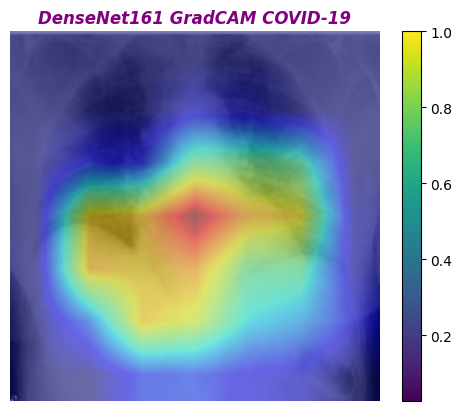

In [ ]:
fig, ax = plt.subplots()

heatmap = ax.imshow(image_numpy)

ax.imshow(cam_map_normalized, cmap='jet', alpha=0.5, interpolation='bilinear')
plt.colorbar(heatmap, fraction=0.06, pad=0.046)
plt.title("DenseNet161 GradCAM COVID-19", color='purple', weight='bold', style='oblique')
ax.axis('off')

plt.show()


In [ ]:
source_path = '/content/gdrive/MyDrive/Interpretability Base Images DN161, RN18, RN34'
pneumonia_2 = cv2.imread(source_path+'/pneumonia_2.jpg')
pneumonia_2 = torch.from_numpy(pneumonia_2)
pneumonia_2 = pneumonia_2.type(torch.FloatTensor) / 255.0
pneumonia_2 = torch.unsqueeze(pneumonia_2, dim=0).permute(0,3,1,2)

In [ ]:
from pytorch_grad_cam import GradCAM

target_layer = [model_dn161.features[-1]]

cam = GradCAM(model=model_dn161, target_layers=target_layer)

cam_map = cam(input_tensor=pneumonia_2, eigen_smooth=True, aug_smooth=True)

print(cam_map)

[[[0.0139616  0.0139616  0.0139616  ... 0.250057   0.250057   0.250057  ]
  [0.0139616  0.0139616  0.0139616  ... 0.250057   0.250057   0.250057  ]
  [0.0139616  0.0139616  0.0139616  ... 0.250057   0.250057   0.250057  ]
  ...
  [0.17043398 0.17043398 0.17043398 ... 0.05728994 0.05728994 0.05728994]
  [0.17043398 0.17043398 0.17043398 ... 0.05728994 0.05728994 0.05728994]
  [0.17043398 0.17043398 0.17043398 ... 0.05728994 0.05728994 0.05728994]]]


In [ ]:
print(type(cam_map))
print(cam_map.shape)
cam_map = np.reshape(cam_map, (224,224,1))
print(cam_map.shape)

<class 'numpy.ndarray'>
(1, 224, 224)
(224, 224, 1)


In [ ]:
image_numpy = torch.squeeze(pneumonia_2, dim=0).permute(1,2,0).numpy()
print(type(image_numpy), image_numpy.shape)

<class 'numpy.ndarray'> (224, 224, 3)


In [ ]:
import matplotlib.pyplot as plt

cam_map_normalized = (cam_map - np.min(cam_map)) / (np.max(cam_map) - np.min(cam_map))

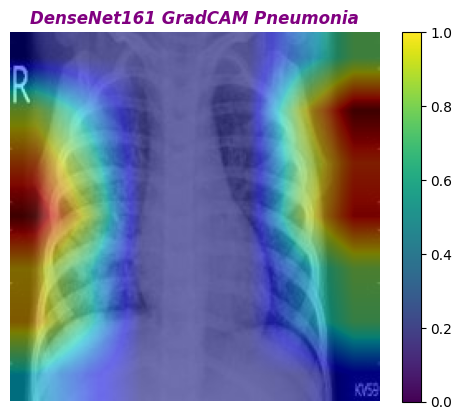

In [ ]:
fig, ax = plt.subplots()

heatmap = ax.imshow(image_numpy)

ax.imshow(cam_map_normalized, cmap='jet', alpha=0.5, interpolation='bilinear')
plt.colorbar(heatmap, fraction=0.06, pad=0.046)
plt.title("DenseNet161 GradCAM Pneumonia", color='purple', weight='bold', style='oblique')
ax.axis('off')

plt.show()


In [ ]:
source_path = '/content/gdrive/MyDrive/Interpretability Base Images DN161, RN18, RN34'
normal_2 = cv2.imread(source_path+'/normal_2.jpg')
normal_2 = torch.from_numpy(normal_2)
normal_2 = normal_2.type(torch.FloatTensor) / 255.0
normal_2 = torch.unsqueeze(normal_2, dim=0).permute(0,3,1,2)

In [ ]:
from pytorch_grad_cam import GradCAM

target_layer = [model_rn18.layer4[-1]]

cam = GradCAM(model=model_rn18, target_layers=target_layer)

cam_map = cam(input_tensor=normal_2, eigen_smooth=True, aug_smooth=True)

print(cam_map)

[[[0.09889107 0.09889107 0.09889107 ... 0.         0.         0.        ]
  [0.09889107 0.09889107 0.09889107 ... 0.         0.         0.        ]
  [0.09889107 0.09889107 0.09889107 ... 0.         0.         0.        ]
  ...
  [0.         0.         0.         ... 0.22450142 0.22450142 0.22450142]
  [0.         0.         0.         ... 0.22450142 0.22450142 0.22450142]
  [0.         0.         0.         ... 0.22450142 0.22450142 0.22450142]]]


In [ ]:
print(type(cam_map))
print(cam_map.shape)
cam_map = np.reshape(cam_map, (224,224,1))
print(cam_map.shape)

<class 'numpy.ndarray'>
(1, 224, 224)
(224, 224, 1)


In [ ]:
image_numpy = torch.squeeze(normal_2, dim=0).permute(1,2,0).numpy()
print(type(image_numpy), image_numpy.shape)

<class 'numpy.ndarray'> (224, 224, 3)


In [ ]:
import matplotlib.pyplot as plt

cam_map_normalized = (cam_map - np.min(cam_map)) / (np.max(cam_map) - np.min(cam_map))

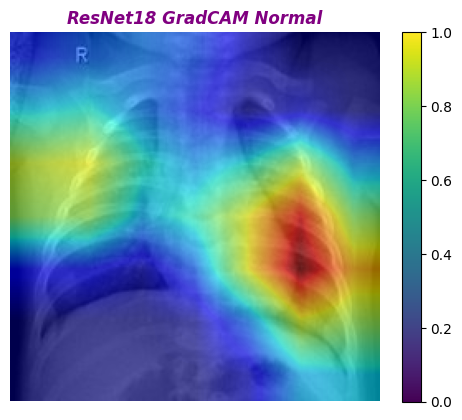

In [ ]:
fig, ax = plt.subplots()

heatmap = ax.imshow(image_numpy)

ax.imshow(cam_map_normalized, cmap='jet', alpha=0.6, interpolation='bilinear')
plt.colorbar(heatmap, fraction=0.06, pad=0.046)
plt.title("ResNet18 GradCAM Normal", color='purple', weight='bold', style='oblique')
ax.axis('off')

plt.show()


In [ ]:
source_path = '/content/gdrive/MyDrive/Interpretability Base Images DN161, RN18, RN34'
covid_2 = cv2.imread(source_path+'/covid_2.jpg')
covid_2 = torch.from_numpy(covid_2)
covid_2 = covid_2.type(torch.FloatTensor) / 255.0
covid_2 = torch.unsqueeze(covid_2, dim=0).permute(0,3,1,2)

In [ ]:
from pytorch_grad_cam import GradCAM

target_layer = [model_rn18.layer4[-1]]

cam = GradCAM(model=model_rn18, target_layers=target_layer)

cam_map = cam(input_tensor=covid_2, eigen_smooth=True, aug_smooth=True)

print(cam_map)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [ ]:
print(type(cam_map))
print(cam_map.shape)
cam_map = np.reshape(cam_map, (224,224,1))
print(cam_map.shape)

<class 'numpy.ndarray'>
(1, 224, 224)
(224, 224, 1)


In [ ]:
image_numpy = torch.squeeze(covid_2, dim=0).permute(1,2,0).numpy()
print(type(image_numpy), image_numpy.shape)

<class 'numpy.ndarray'> (224, 224, 3)


In [ ]:
import matplotlib.pyplot as plt

cam_map_normalized = (cam_map - np.min(cam_map)) / (np.max(cam_map) - np.min(cam_map))

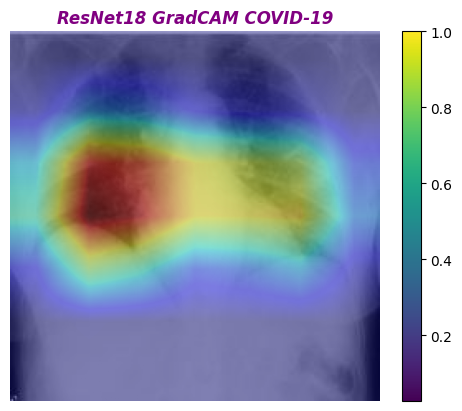

In [ ]:
fig, ax = plt.subplots()

heatmap = ax.imshow(image_numpy)

ax.imshow(cam_map_normalized, cmap='jet', alpha=0.4, interpolation='bilinear')
plt.colorbar(heatmap, fraction=0.06, pad=0.046)
plt.title("ResNet18 GradCAM COVID-19", color='purple', weight='bold', style='oblique')
ax.axis('off')

plt.show()


In [ ]:
source_path = '/content/gdrive/MyDrive/Interpretability Base Images DN161, RN18, RN34'
pneumonia_2 = cv2.imread(source_path+'/pneumonia_2.jpg')
pneumonia_2 = torch.from_numpy(pneumonia_2)
pneumonia_2 = pneumonia_2.type(torch.FloatTensor) / 255.0
pneumonia_2 = torch.unsqueeze(pneumonia_2, dim=0).permute(0,3,1,2)

In [ ]:
from pytorch_grad_cam import GradCAM

target_layer = [model_rn18.layer4[-1]]

cam = GradCAM(model=model_rn18, target_layers=target_layer)

cam_map = cam(input_tensor=pneumonia_2, eigen_smooth=True, aug_smooth=True)

print(cam_map)

[[[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  ...
  [0.0510789  0.0510789  0.0510789  ... 0.31577656 0.31577656 0.31577656]
  [0.0510789  0.0510789  0.0510789  ... 0.31577656 0.31577656 0.31577656]
  [0.0510789  0.0510789  0.0510789  ... 0.31577656 0.31577656 0.31577656]]]


In [ ]:
print(type(cam_map))
print(cam_map.shape)
cam_map = np.reshape(cam_map, (224,224,1))
print(cam_map.shape)

<class 'numpy.ndarray'>
(1, 224, 224)
(224, 224, 1)


In [ ]:
image_numpy = torch.squeeze(pneumonia_2, dim=0).permute(1,2,0).numpy()
print(type(image_numpy), image_numpy.shape)

<class 'numpy.ndarray'> (224, 224, 3)


In [ ]:
import matplotlib.pyplot as plt

cam_map_normalized = (cam_map - np.min(cam_map)) / (np.max(cam_map) - np.min(cam_map))

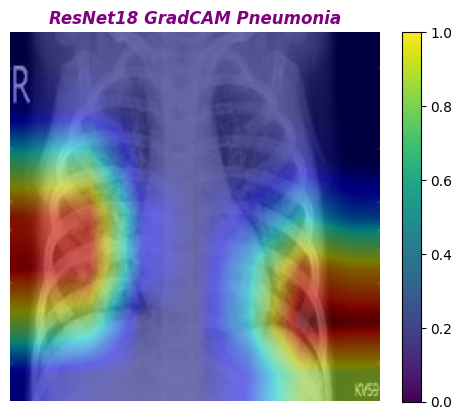

In [ ]:
fig, ax = plt.subplots()

heatmap = ax.imshow(image_numpy)

ax.imshow(cam_map_normalized, cmap='jet', alpha=0.5, interpolation='bilinear')
plt.colorbar(heatmap, fraction=0.06, pad=0.046)
plt.title("ResNet18 GradCAM Pneumonia", color='purple', weight='bold', style='oblique')
ax.axis('off')

plt.show()


In [ ]:
source_path = '/content/gdrive/MyDrive/Interpretability Base Images DN161, RN18, RN34'
normal_2 = cv2.imread(source_path+'/normal_2.jpg')
normal_2 = torch.from_numpy(normal_2)
normal_2 = normal_2.type(torch.FloatTensor) / 255.0
normal_2 = torch.unsqueeze(normal_2, dim=0).permute(0,3,1,2)

In [ ]:
from pytorch_grad_cam import GradCAM

target_layer = [model_rn34.layer4[-1]]

cam = GradCAM(model=model_rn34, target_layers=target_layer)

cam_map = cam(input_tensor=normal_2, eigen_smooth=True, aug_smooth=True)

print(cam_map)

[[[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  ...
  [0.08694866 0.08694866 0.08694866 ... 0.14487422 0.14487422 0.14487422]
  [0.08694866 0.08694866 0.08694866 ... 0.14487422 0.14487422 0.14487422]
  [0.08694866 0.08694866 0.08694866 ... 0.14487422 0.14487422 0.14487422]]]


In [ ]:
print(type(cam_map))
print(cam_map.shape)
cam_map = np.reshape(cam_map, (224,224,1))
print(cam_map.shape)

<class 'numpy.ndarray'>
(1, 224, 224)
(224, 224, 1)


In [ ]:
image_numpy = torch.squeeze(normal_2, dim=0).permute(1,2,0).numpy()
print(type(image_numpy), image_numpy.shape)

<class 'numpy.ndarray'> (224, 224, 3)


In [ ]:
import matplotlib.pyplot as plt

cam_map_normalized = (cam_map - np.min(cam_map)) / (np.max(cam_map) - np.min(cam_map))

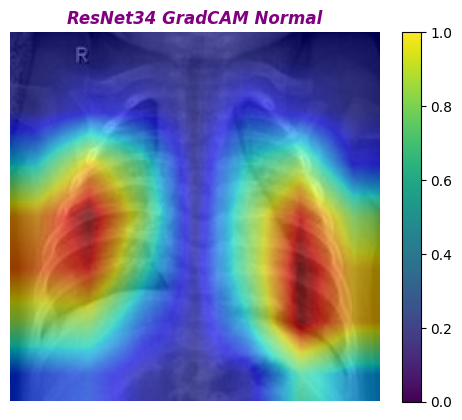

In [ ]:
fig, ax = plt.subplots()

heatmap = ax.imshow(image_numpy)

ax.imshow(cam_map_normalized, cmap='jet', alpha=0.6, interpolation='bilinear')
plt.colorbar(heatmap, fraction=0.06, pad=0.046)
plt.title("ResNet34 GradCAM Normal", color='purple', weight='bold', style='oblique')
ax.axis('off')

plt.show()


In [ ]:
source_path = '/content/gdrive/MyDrive/Interpretability Base Images DN161, RN18, RN34'
covid_2 = cv2.imread(source_path+'/covid_2.jpg')
covid_2 = torch.from_numpy(covid_2)
covid_2 = covid_2.type(torch.FloatTensor) / 255.0
covid_2 = torch.unsqueeze(covid_2, dim=0).permute(0,3,1,2)

In [ ]:
from pytorch_grad_cam import GradCAM

target_layer = [model_rn34.layer4[-1]]

cam = GradCAM(model=model_rn34, target_layers=target_layer)

cam_map = cam(input_tensor=covid_2, eigen_smooth=True, aug_smooth=True)

print(cam_map)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [ ]:
print(type(cam_map))
print(cam_map.shape)
cam_map = np.reshape(cam_map, (224,224,1))
print(cam_map.shape)

<class 'numpy.ndarray'>
(1, 224, 224)
(224, 224, 1)


In [ ]:
image_numpy = torch.squeeze(covid_2, dim=0).permute(1,2,0).numpy()
print(type(image_numpy), image_numpy.shape)

<class 'numpy.ndarray'> (224, 224, 3)


In [ ]:
import matplotlib.pyplot as plt

cam_map_normalized = (cam_map - np.min(cam_map)) / (np.max(cam_map) - np.min(cam_map))

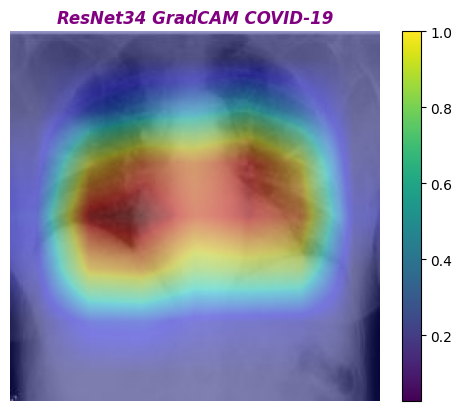

In [ ]:
fig, ax = plt.subplots()

heatmap = ax.imshow(image_numpy)

ax.imshow(cam_map_normalized, cmap='jet', alpha=0.4, interpolation='bilinear')
plt.colorbar(heatmap, fraction=0.06, pad=0.046)
plt.title("ResNet34 GradCAM COVID-19", color='purple', weight='bold', style='oblique')
ax.axis('off')

plt.show()


In [ ]:
source_path = '/content/gdrive/MyDrive/Interpretability Base Images DN161, RN18, RN34'
pneumonia_2 = cv2.imread(source_path+'/pneumonia_2.jpg')
pneumonia_2 = torch.from_numpy(pneumonia_2)
pneumonia_2 = pneumonia_2.type(torch.FloatTensor) / 255.0
pneumonia_2 = torch.unsqueeze(pneumonia_2, dim=0).permute(0,3,1,2)

In [ ]:
from pytorch_grad_cam import GradCAM

target_layer = [model_rn34.layer4[-1]]

cam = GradCAM(model=model_rn34, target_layers=target_layer)

cam_map = cam(input_tensor=pneumonia_2, eigen_smooth=True, aug_smooth=True)

print(cam_map)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [ ]:
print(type(cam_map))
print(cam_map.shape)
cam_map = np.reshape(cam_map, (224,224,1))
print(cam_map.shape)

<class 'numpy.ndarray'>
(1, 224, 224)
(224, 224, 1)


In [ ]:
image_numpy = torch.squeeze(pneumonia_2, dim=0).permute(1,2,0).numpy()
print(type(image_numpy), image_numpy.shape)

<class 'numpy.ndarray'> (224, 224, 3)


In [ ]:
import matplotlib.pyplot as plt

cam_map_normalized = (cam_map - np.min(cam_map)) / (np.max(cam_map) - np.min(cam_map))

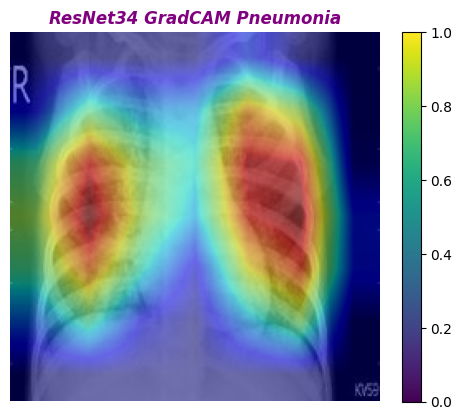

In [ ]:
fig, ax = plt.subplots()

heatmap = ax.imshow(image_numpy)

ax.imshow(cam_map_normalized, cmap='jet', alpha=0.5, interpolation='bilinear')
plt.colorbar(heatmap, fraction=0.06, pad=0.046)
plt.title("ResNet34 GradCAM Pneumonia", color='purple', weight='bold', style='oblique')
ax.axis('off')

plt.show()
